In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [23]:
# utf-8 오류가 발생했을 때, enconding='CP949' 추가 입력
df = pd.read_csv("data/전국도서관표준데이터.csv", encoding='CP949')
df.shape

(3318, 28)

In [24]:
df.head()

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,운영기관명,도서관전화번호,부지면적,건물면적,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,덕산아내프리미엄아파트 작은도서관,경상남도,거제시,작은도서관,"매주월요일, 공휴일",16:00,22:00,16:00,22:00,16:00,...,경상남도 거제시 덕산아내프리미엄1차아파트입주자대표회,055-681-9766,31675.0,142.0,NaN,34.866433,128.684936,2020-01-30,5370000,경상남도 거제시
1,강하작은도서관,경기도,양평군,작은도서관,"매주일,월/공휴일",09:00,18:00,09:00,18:00,00:00,...,경기도 양평군청,031-771-4302,634.0,179.0,http://www.yplib.go.kr,37.496177,127.411217,2020-03-06,4170000,경기도 양평군
2,강상작은도서관,경기도,양평군,작은도서관,"매주일,월/공휴일",09:00,18:00,09:00,18:00,00:00,...,경기도 양평군청,031-775-7483,3927.0,140.0,http://www.yplib.go.kr,37.480695,127.478067,2020-03-06,4170000,경기도 양평군
3,양동도서관,경기도,양평군,공공도서관,"신정,설,추석연휴",08:00,22:00,08:00,22:00,08:00,...,경기도 양평군청,031-770-2571,3434.0,1314.0,http://www.yplib.go.kr,37.419191,127.754688,2020-03-06,4170000,경기도 양평군
4,지평도서관,경기도,양평군,공공도서관,"신정,설,추석연휴",08:00,22:00,08:00,22:00,08:00,...,경기도 양평군청,031-770-2561,2215.0,1045.0,http://www.yplib.go.kr,37.473719,127.638517,2020-03-06,4170000,경기도 양평군


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 28 columns):
도서관명          3318 non-null object
시도명           3318 non-null object
시군구명          3318 non-null object
도서관유형         3318 non-null object
휴관일           3318 non-null object
평일운영시작시각      3318 non-null object
평일운영종료시각      3318 non-null object
토요일운영시작시각     3318 non-null object
토요일운영종료시각     3318 non-null object
공휴일운영시작시각     3318 non-null object
공휴일운영종료시각     3318 non-null object
열람좌석수         3318 non-null int64
자료수(도서)       3318 non-null int64
자료수(연속간행물)    3318 non-null int64
자료수(비도서)      3318 non-null int64
대출가능권수        3318 non-null int64
대출가능일수        3318 non-null int64
소재지도로명주소      3318 non-null object
운영기관명         2689 non-null object
도서관전화번호       3128 non-null object
부지면적          1892 non-null float64
건물면적          2821 non-null float64
홈페이지주소        2112 non-null object
위도            3169 non-null float64
경도            3169 non-null float64
데이터기준일자       3318 n

In [26]:
df.columns

Index(['도서관명', '시도명', '시군구명', '도서관유형', '휴관일', '평일운영시작시각', '평일운영종료시각',
       '토요일운영시작시각', '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '열람좌석수', '자료수(도서)',
       '자료수(연속간행물)', '자료수(비도서)', '대출가능권수', '대출가능일수', '소재지도로명주소', '운영기관명',
       '도서관전화번호', '부지면적', '건물면적', '홈페이지주소', '위도', '경도', '데이터기준일자', '제공기관코드',
       '제공기관명'],
      dtype='object')

In [31]:
null_count = df.isnull().sum()
null_count

도서관명             0
시도명              0
시군구명             0
도서관유형            0
휴관일              0
평일운영시작시각         0
평일운영종료시각         0
토요일운영시작시각        0
토요일운영종료시각        0
공휴일운영시작시각        0
공휴일운영종료시각        0
열람좌석수            0
자료수(도서)          0
자료수(연속간행물)       0
자료수(비도서)         0
대출가능권수           0
대출가능일수           0
소재지도로명주소         0
운영기관명          629
도서관전화번호        190
부지면적          1426
건물면적           497
홈페이지주소        1206
위도             149
경도             149
데이터기준일자          0
제공기관코드           0
제공기관명            0
dtype: int64

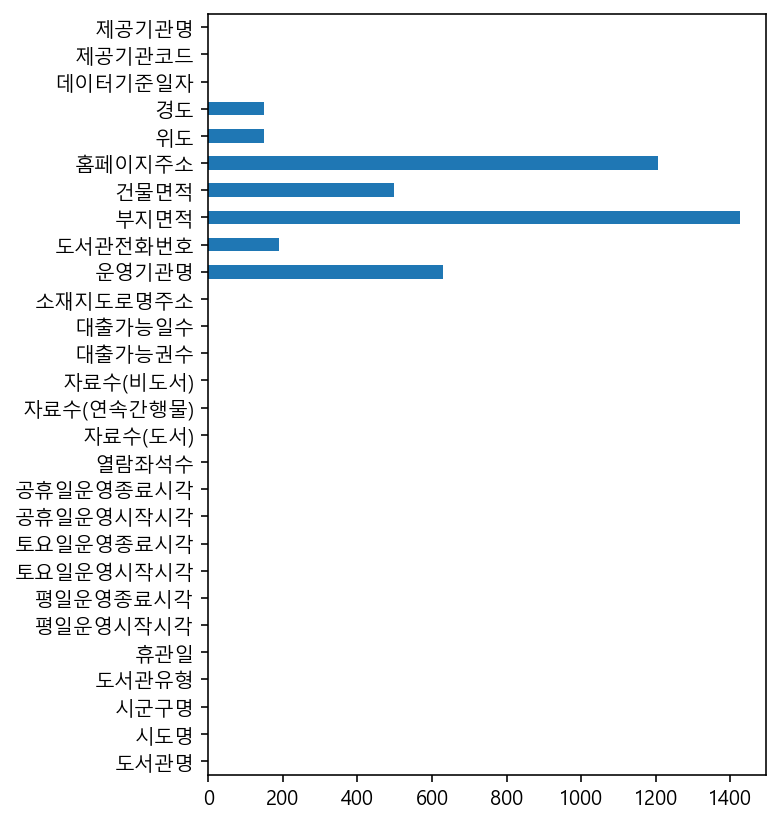

In [35]:
null_count.plot.barh(figsize=(5,7))

In [37]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,도서관명,0
1,시도명,0
2,시군구명,0
3,도서관유형,0
4,휴관일,0


In [38]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.tail()

,컬럼명,결측치수
23,위도,149
24,경도,149
25,데이터기준일자,0
26,제공기관코드,0
27,제공기관명,0


In [79]:
df_null_count_top = df_null_count.sort_values(by=['결측치수'], ascending=False).head(5)
df_null_count_top

,컬럼명,결측치수
20,부지면적,1426
22,홈페이지주소,1206
18,운영기관명,629
21,건물면적,497
19,도서관전화번호,190


In [80]:
df["부지면적"].head()

KeyError: '부지면적'

In [81]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['부지면적', '홈페이지주소', '운영기관명', '건물면적', '도서관전화번호']

In [82]:
df[drop_columns].head()

KeyError: "None of [Index(['부지면적', '홈페이지주소', '운영기관명', '건물면적', '도서관전화번호'], dtype='object')] are in the [columns]"

In [96]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(3318, 21)


KeyError: "['부지면적' '홈페이지주소' '운영기관명' '건물면적' '도서관전화번호'] not found in axis"

In [84]:
df.dtypes

도서관명          object
시도명           object
시군구명          object
도서관유형         object
휴관일           object
평일운영시작시각      object
평일운영종료시각      object
토요일운영시작시각     object
토요일운영종료시각     object
공휴일운영시작시각     object
공휴일운영종료시각     object
열람좌석수          int64
자료수(도서)        int64
자료수(연속간행물)     int64
자료수(비도서)       int64
대출가능권수         int64
대출가능일수         int64
소재지도로명주소      object
데이터기준일자       object
제공기관코드        object
제공기관명         object
dtype: object

In [85]:
df['열람좌석수'].mean()

130.77124773960216

In [86]:
df["자료수(도서)"].describe()

count    3.318000e+03
mean     3.951643e+04
std      7.913651e+04
min      0.000000e+00
25%      4.725500e+03
50%      1.050400e+04
75%      4.621850e+04
max      2.599696e+06
Name: 자료수(도서), dtype: float64

In [87]:
df["자료수(도서)"].mean()

39516.42857142857

In [88]:
df[['열람좌석수', '자료수(도서)']].describe()

,열람좌석수,자료수(도서)
count,3318.000000,3.318000e+03
mean,130.771248,3.951643e+04
std,228.258200,7.913651e+04
min,0.000000,0.000000e+00
25%,20.000000,4.725500e+03
50%,39.000000,1.050400e+04
75%,141.000000,4.621850e+04
max,3989.000000,2.599696e+06


In [89]:
df.describe(include="object")

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,공휴일운영종료시각,소재지도로명주소,데이터기준일자,제공기관코드,제공기관명
count,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318
unique,2960,17,224,6,705,31,30,26,27,24,22,3082,154,277,277
top,중앙도서관,경기도,서구,작은도서관,매주 일요일,09:00,18:00,09:00,18:00,00:00,00:00,서울특별시 양천구 목동중앙남로 16나길 55,2020-06-30,4050000,경기도 용인시
freq,17,526,206,2023,85,1618,1463,1258,933,2213,2168,7,270,133,133


In [90]:
df['도서관유형'].unique()

array(['작은도서관', '공공도서관', '어린이도서관', '전문도서관', '학교도서관', '대학도서관'],
      dtype=object)

In [91]:
df['도서관유형'].nunique()

6

In [92]:
df['평일운영시작시각'].unique()

array(['16:00', '09:00', '08:00', '10:00', '13:00', '06:00', '07:00',
       '14:00', '09:30', '12:00', '15:00', '11:00', '13:30', '00:00',
       '14:30', '17:20', '17:30', '19:00', '12:30', '10:30', '17:00',
       '07:30', '18:30', '7:00', '8:00', '16:30', '15:30', '08:30',
       '12:40', '08:20', '08:40'], dtype=object)

In [93]:
df['시도명'].head()

0    경상남도
1     경기도
2     경기도
3     경기도
4     경기도
Name: 시도명, dtype: object

In [94]:
city = df['시도명'].value_counts()
city

경기도        526
서울특별시      523
경상남도       397
광주광역시      270
대구광역시      216
전라북도       193
울산광역시      189
인천광역시      182
부산광역시      162
경상북도       147
대전광역시      113
전라남도        98
충청북도        96
충청남도        84
강원도         70
제주특별자치도     42
세종특별자치시     10
Name: 시도명, dtype: int64

In [95]:
city_normalize = df["시도명"].value_counts(normalize = True)
city_normalize

경기도        0.158529
서울특별시      0.157625
경상남도       0.119650
광주광역시      0.081374
대구광역시      0.065099
전라북도       0.058168
울산광역시      0.056962
인천광역시      0.054852
부산광역시      0.048825
경상북도       0.044304
대전광역시      0.034057
전라남도       0.029536
충청북도       0.028933
충청남도       0.025316
강원도        0.021097
제주특별자치도    0.012658
세종특별자치시    0.003014
Name: 시도명, dtype: float64

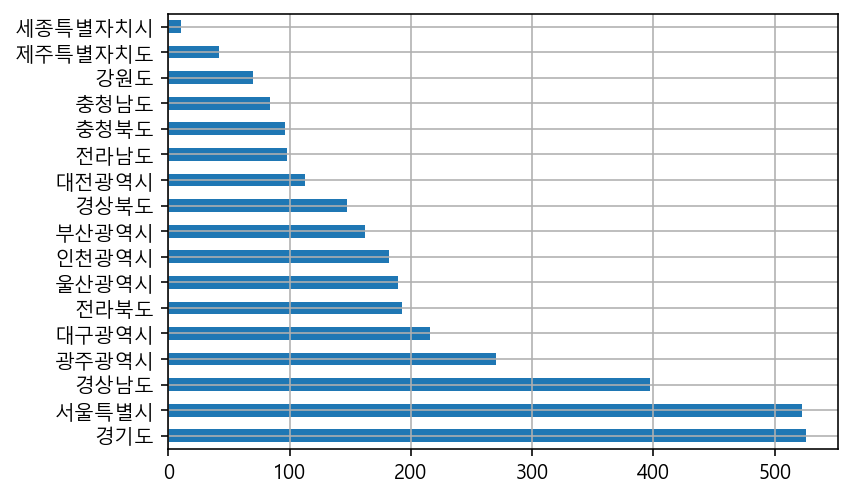

In [73]:
city.plot.barh(grid=True)

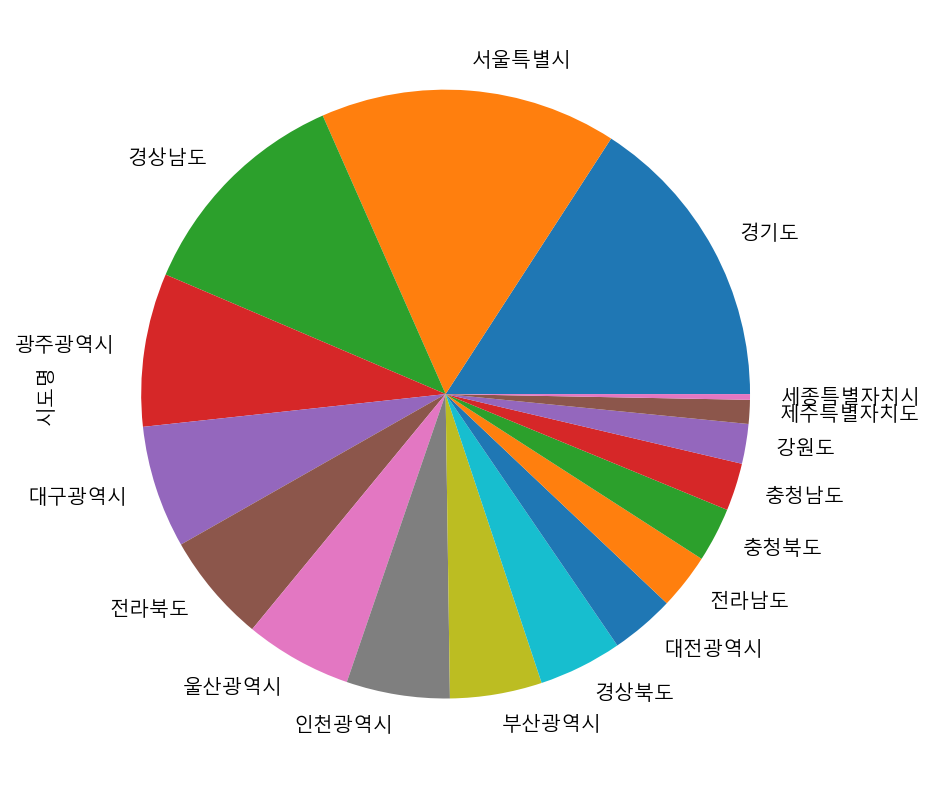

In [75]:
city_normalize.plot.pie(figsize=(7,7))

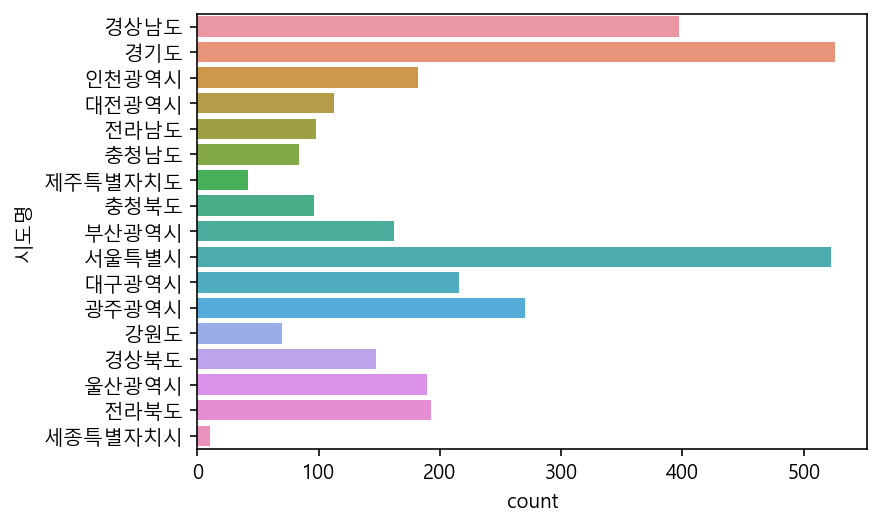

In [76]:
sns.countplot(data=df, y="시도명")

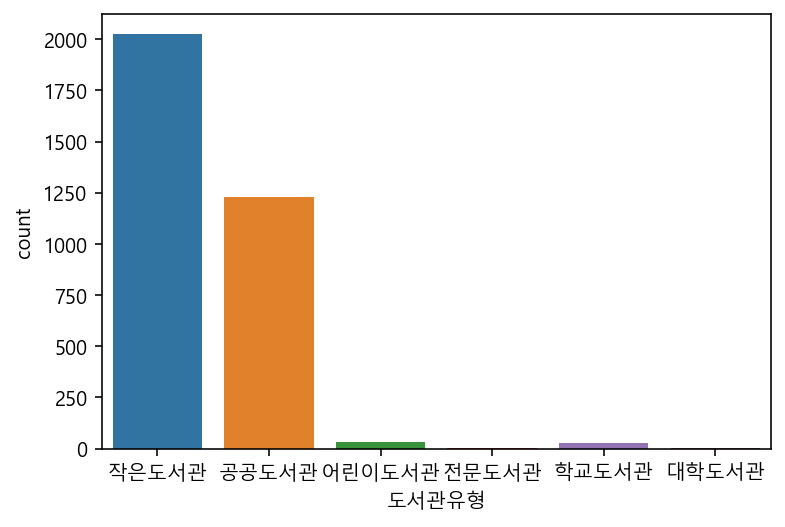

In [97]:
sns.countplot(data=df, x="도서관유형")

In [100]:
df_medical = df[df['도서관유형'] == '공공도서관'].copy()
df_medical.head()

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,열람좌석수,자료수(도서),자료수(연속간행물),자료수(비도서),대출가능권수,대출가능일수,소재지도로명주소,데이터기준일자,제공기관코드,제공기관명
3,양동도서관,경기도,양평군,공공도서관,"신정,설,추석연휴",08:00,22:00,08:00,22:00,08:00,...,200,46393,16,3957,7,14,경기도 양평군 양동면 학둔지아래길 93,2020-03-06,4170000,경기도 양평군
4,지평도서관,경기도,양평군,공공도서관,"신정,설,추석연휴",08:00,22:00,08:00,22:00,08:00,...,162,42674,20,1403,7,14,경기도 양평군 지평면 지평의병로116번길 5-1,2020-03-06,4170000,경기도 양평군
5,용문도서관,경기도,양평군,공공도서관,"신정,설,추석연휴",08:00,00:00,08:00,00:00,08:00,...,302,92824,11,3497,7,14,경기도 양평군 용문면 용문로 395,2020-03-06,4170000,경기도 양평군
6,양서친환경도서관,경기도,양평군,공공도서관,"신정,설,추석연휴",08:00,00:00,08:00,00:00,08:00,...,293,84032,15,3339,7,14,경기도 양평군 양서면 양수로 110,2020-03-06,4170000,경기도 양평군
7,어린이도서관,경기도,양평군,공공도서관,매주월/공휴일,09:00,18:00,09:00,18:00,09:00,...,475,80327,16,5481,7,14,경기도 양평군 양평읍 양근로 240-9,2020-03-06,4170000,경기도 양평군


In [102]:
df.loc[df['시도명'] == '경기도', '시군구명']

1       양평군
2       양평군
3       양평군
4       양평군
5       양평군
       ... 
3093    하남시
3094    하남시
3095    하남시
3096    하남시
3097    하남시
Name: 시군구명, Length: 526, dtype: object

In [103]:
df.loc[df['시도명'] == '경기도', '시군구명'].value_counts()

용인시         133
군포시          45
시흥시          27
화성시          22
의정부시         20
안산시          19
고양시 덕양구      19
파주시          17
평택시          15
성남시          14
양평군          14
안성시          12
남양주시         12
광주시          11
단원구          11
양주시           9
영통구           9
고양시 일산동구      9
부천시           8
구리시           8
팔달구           7
오산시           7
고양시 일산서구      7
여주시           7
광명시           6
권선구           6
김포시           6
포천시           6
안양시 동안구       6
이천시           5
하남시           5
가평군           4
장안구           4
동두천시          4
안양시 만안구       4
의왕시           3
과천시           2
연천군           2
수원시           1
Name: 시군구명, dtype: int64

In [105]:
df_seoul_lib = df[(df['도서관유형'] == '공공도서관') & (df['시도명'] == '서울특별시')]
print(df_seoul_lib.shape)
df_seoul_lib.head()

(174, 21)


,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,열람좌석수,자료수(도서),자료수(연속간행물),자료수(비도서),대출가능권수,대출가능일수,소재지도로명주소,데이터기준일자,제공기관코드,제공기관명
103,대방어린이도서관,서울특별시,동작구,공공도서관,"매주 월요일, 법정공휴일",09:00,18:00,09:00,17:00,00:00,...,50,25006,13,344,5,14,서울특별시 동작구 대방동길 55,2020-04-02,3190000,서울특별시 동작구
105,동작어린이도서관,서울특별시,동작구,공공도서관,"매주 월요일, 법정공휴일",09:00,18:00,09:00,17:00,00:00,...,130,49508,35,1149,5,14,서울특별시 동작구 장승배기로16길 98,2020-04-02,3190000,서울특별시 동작구
106,동작상도국주도서관,서울특별시,동작구,공공도서관,"매주 월요일, 법정공휴일",09:00,22:00,09:00,17:00,00:00,...,100,46225,13,1172,5,14,서울특별시 동작구 매봉로 37,2020-04-02,3190000,서울특별시 동작구
212,영어특성화도서관,서울특별시,양천구,공공도서관,"일요일, 법정공휴일",09:00,22:00,10:00,18:00,00:00,...,100,64936,0,2593,20,14,서울특별시 양천구 화곡로4길 10,2019-11-13,3140000,서울특별시 양천구
213,해맞이역사도서관,서울특별시,양천구,공공도서관,"매주월, 법정공휴일",09:00,22:00,09:00,18:00,00:00,...,160,23690,0,0,20,14,서울특별시 양천구 화곡로4길 10,2019-11-13,3140000,서울특별시 양천구


In [107]:
c = df_seoul_lib["시군구명"].value_counts()
c

성동구          23
서울특별시 도봉구    13
성북구          12
송파구          12
구로구          11
강남구          11
노원구　         10
양천구           8
강서구           8
은평구           8
강북구           7
서초구           6
중랑구           6
강동구           5
관악구           5
동작구           5
마포구           4
영등포구          4
광진구           4
금천구           4
서대문구          3
종로구           3
용산구           2
Name: 시군구명, dtype: int64

In [108]:
n = df_seoul_lib['시군구명'].value_counts(normalize=True)
n.head()

성동구          0.132184
서울특별시 도봉구    0.074713
성북구          0.068966
송파구          0.068966
구로구          0.063218
Name: 시군구명, dtype: float64

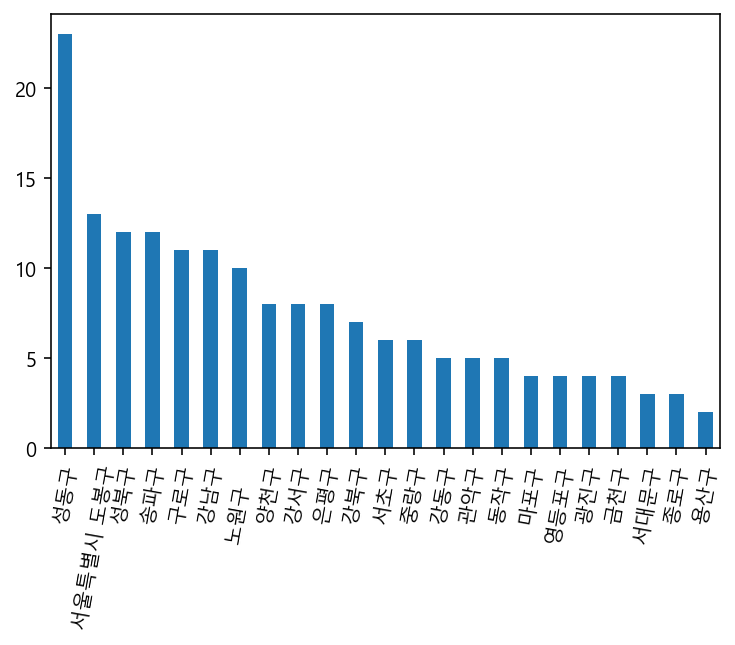

In [113]:
c.plot.bar(rot=80)

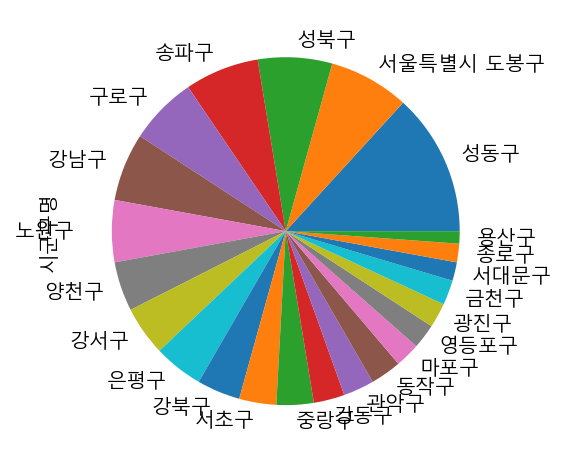

In [115]:
n.plot.pie()

In [120]:
df_seoul_lib.loc[df_seoul_lib['도서관명'].str.contains("어린이"), "도서관명"].unique()

array(['대방어린이도서관', '동작어린이도서관', '노원어린이도서관', '월계어린이도서관', '개봉어린이도서관',
       '글마루한옥어린이도서관', '궁동어린이도서관', '신도림어린이영어작은도서관', '어린이청소년국학도서관',
       '용답동어린이작은도서관', '성수2가제1동어린이작은도서관', '성수1가제2동어린이작은도서관',
       '금호4가동어린이작은도서관', '금호2,3가동어린이작은도서관', '응봉동어린이작은도서관', '행당제2동어린이작은도서관',
       '사근동어린이놀이터도서관', '중랑숲어린이도서관', '중화어린이도서관', '아리랑어린이도서관', '송파어린이도서관',
       '송파어린이영어', '꿈꾸는어린이도서관', '길꽃어린이도서관', '삼각산어린이도서관', '남가좌새롬어린이도서관',
       '마포푸르메어린이도서관', '도봉어린이문화정보도서관(디지털자료실)',
       '도봉어린이문화정보센터(자료열람실, 잉글리시 아일랜드)', '학마을도서관 (어린이 자료실)',
       '서울특별시교육청도봉도서관(어린이자료실)', '도봉문화정보도서관(어린이열람실)', '도봉어린이문화정보도서관(영 유아)'],
      dtype=object)

In [121]:
drop_row = df_seoul_lib[
    df_seoul_lib["도서관명"].str.contains("어린이|역사|상도|특성")].index
drop_row = drop_row.tolist()
drop_row

[103,
 105,
 106,
 212,
 213,
 463,
 471,
 596,
 599,
 600,
 601,
 994,
 1303,
 1306,
 1307,
 1310,
 1311,
 1313,
 1314,
 1315,
 2155,
 2156,
 2177,
 2189,
 2196,
 2440,
 2442,
 2454,
 2865,
 3030,
 3273,
 3274,
 3276,
 3298,
 3301,
 3302]

In [122]:
print(df_seoul_lib.shape)
df_seoul_lib = df_seoul_lib.drop(drop_row, axis=0)
print(df_seoul_lib.shape)

(174, 21)
(138, 21)


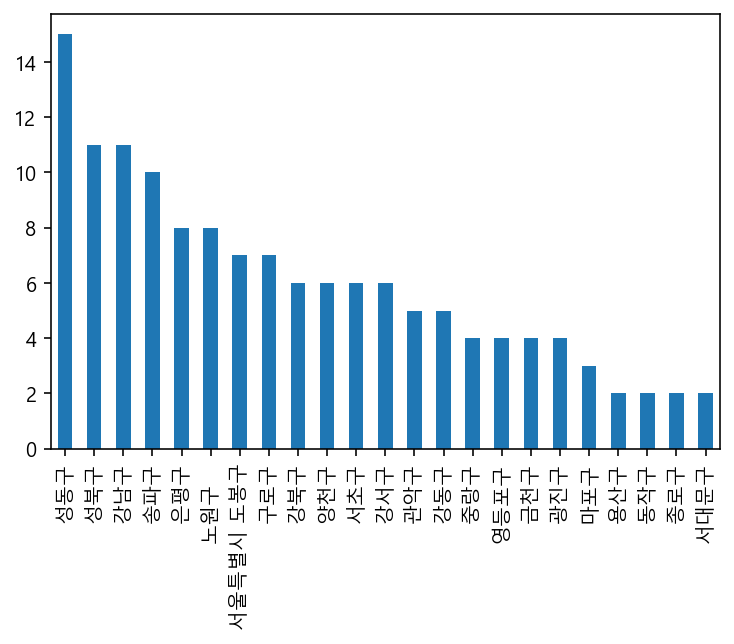

In [123]:
df_seoul_lib["시군구명"].value_counts().plot.bar()

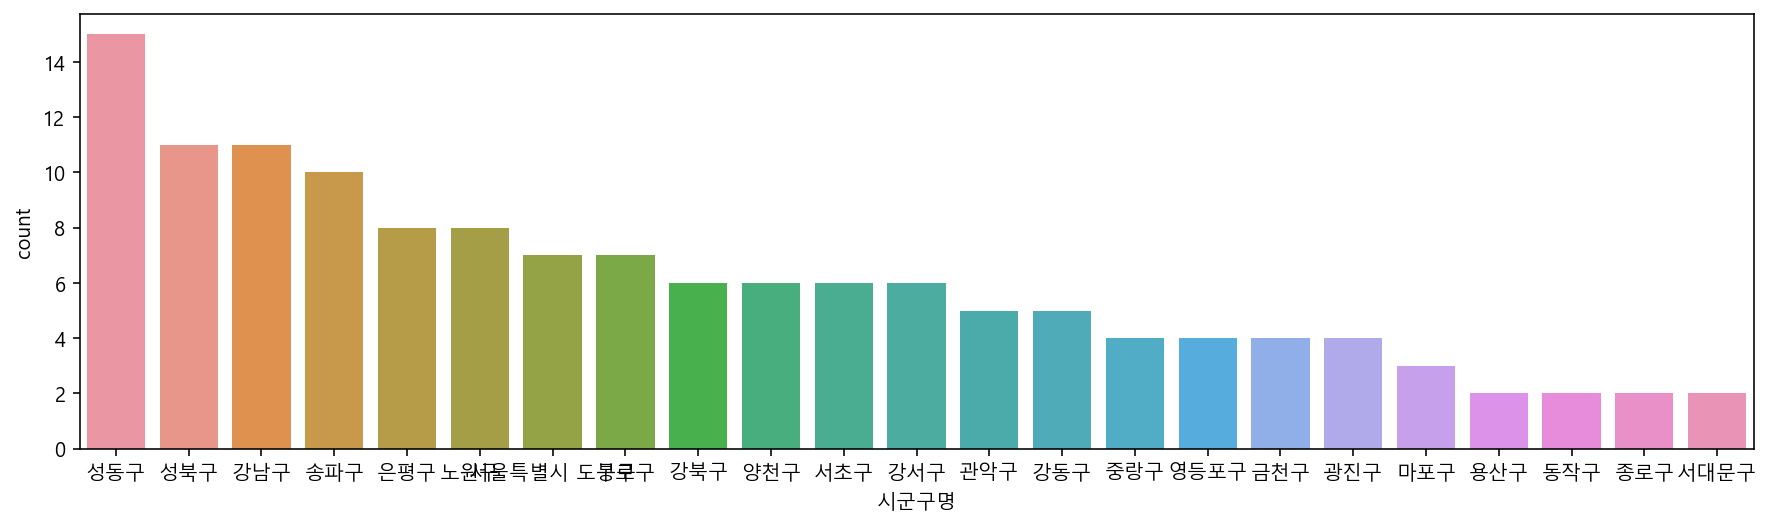

In [125]:
plt.figure(figsize=(15,4))
sns.countplot(data = df_seoul_lib, x="시군구명", 
             order=df_seoul_lib["시군구명"].value_counts().index)

In [126]:
df_seoul_lib["도서관명"].unique()

array(['방아다리문학도서관', '개울건강도서관', '목마교육도서관', '미감도서관', '신월음악도서관', '갈산도서관',
       '약수도서관', '사당솔밭도서관', '노원정보도서관', '월계문화정보도서관', '상계문화정보도서관', '불암도서관',
       '화랑도서관', '한내도서관', '향기나무도서관', '공릉도서관', '꿈나무도서관', '꿈마을도서관',
       '구로구립온누리도서관', '하늘도서관', '개봉도서관', '구로기적의도서관', '오류도서관',
       '서울특별시교육청송파도서관', '여의디지털도서관', '선유정보문화도서관', '문래정보문화도서관', '대림정보문화도서관',
       '청운문학도서관', '아름꿈도서관', '송정동늘푸른작은도서관', '성수2가제3동작은도서관', '성수1가제1동작은도서관',
       '옥수동북카페', '금호1가동우리동네북카페책단지꿀단지', '마장동작은도서관', '왕십리제2동작은도서관',
       '왕십리도선동희망문고', '성동구립청계도서관', '성동구립성수도서관', '성동구립무지개도서관', '성동구립용답도서관',
       '성동구립금호도서관', '성동구립도서관', '성동자활센터푸른하늘공부방청소년작은도서관', '금천구립시흥도서관',
       '금천구립금나래도서관', '금천구립가산도서관', '금천구립독산도서관', '도곡정보문화도서관', '논현도서관',
       '정다운도서관', '청담도서관', '대치도서관', '즐거운도서관', '행복한도서관', '역삼푸른솔도서관',
       '역삼도서관', '열린도서관', '못골도서관', '중랑구립정보도서관', '중랑구립면목정보도서관', '양원숲속도서관',
       '중랑상봉도서관', '성북정보도서관', '아리랑도서관', '해오름도서관', '종암동새날도서관', '석관동미리내도서관',
       '달빛마루도서관', '정릉도서관', '청수도서관', '월곡꿈그림도서관', '장위행복누림도서관', '성북길빛도서관',
       '송파글마루도서관'

In [127]:
df_seoul_lib.loc[~df_seoul_lib["도서관명"].str.contains("도서관"), "도서관명"]

1309                옥수동북카페
1312    금호1가동우리동네북카페책단지꿀단지
1318            왕십리도선동희망문고
2191               소나무언덕1호
2192               소나무언덕2호
2193               소나무언덕3호
2194               소나무언덕4호
2195            소나무언덕 잠실본동
3277             방학동영유아플라자
3278              창동영유아플라자
Name: 도서관명, dtype: object

In [130]:
drop_row2 = df_seoul_lib[
    df_seoul_lib["도서관명"].str.contains("북카페|문고|소나무|영유아")].index
drop_row2 = drop_row2.tolist()
drop_row2

[1309, 1312, 1318, 2191, 2192, 2193, 2194, 2195, 3277, 3278]

In [131]:
df_seoul_lib = df_seoul_lib.drop(drop_row2, axis=0)

In [132]:
df_seoul_lib["도서관명"].unique()

array(['방아다리문학도서관', '개울건강도서관', '목마교육도서관', '미감도서관', '신월음악도서관', '갈산도서관',
       '약수도서관', '사당솔밭도서관', '노원정보도서관', '월계문화정보도서관', '상계문화정보도서관', '불암도서관',
       '화랑도서관', '한내도서관', '향기나무도서관', '공릉도서관', '꿈나무도서관', '꿈마을도서관',
       '구로구립온누리도서관', '하늘도서관', '개봉도서관', '구로기적의도서관', '오류도서관',
       '서울특별시교육청송파도서관', '여의디지털도서관', '선유정보문화도서관', '문래정보문화도서관', '대림정보문화도서관',
       '청운문학도서관', '아름꿈도서관', '송정동늘푸른작은도서관', '성수2가제3동작은도서관', '성수1가제1동작은도서관',
       '마장동작은도서관', '왕십리제2동작은도서관', '성동구립청계도서관', '성동구립성수도서관', '성동구립무지개도서관',
       '성동구립용답도서관', '성동구립금호도서관', '성동구립도서관', '성동자활센터푸른하늘공부방청소년작은도서관',
       '금천구립시흥도서관', '금천구립금나래도서관', '금천구립가산도서관', '금천구립독산도서관', '도곡정보문화도서관',
       '논현도서관', '정다운도서관', '청담도서관', '대치도서관', '즐거운도서관', '행복한도서관',
       '역삼푸른솔도서관', '역삼도서관', '열린도서관', '못골도서관', '중랑구립정보도서관', '중랑구립면목정보도서관',
       '양원숲속도서관', '중랑상봉도서관', '성북정보도서관', '아리랑도서관', '해오름도서관', '종암동새날도서관',
       '석관동미리내도서관', '달빛마루도서관', '정릉도서관', '청수도서관', '월곡꿈그림도서관', '장위행복누림도서관',
       '성북길빛도서관', '송파글마루도서관', '거마도서관', '돌마리도서관', '송파위례도서관', '은평구립도서관',
       '증산